In [14]:
import pandas as pd
import numpy as np
import matplotlib as matplot
from scipy import stats


In [15]:
df = pd.read_csv('dater.csv')
df.head()

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,1,3.78,2076,CL,1/7/12,1.250,1.250,1.250,1.263,0.131,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.081,NaN
1,1,3.78,2076,GC,1/7/12,0.855,0.786,0.604,0.544,0.597,...,0.374,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,NaN
2,1,3.78,2076,GG,1/7/12,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
3,1,3.78,2076,CL,2/7/12,1.250,1.250,1.125,0.000,0.925,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.069,NaN
4,1,3.78,2076,GC,2/7/12,0.309,0.082,0.059,0.097,0.290,...,0.353,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,NaN


In [16]:
both_index = df.set_index("Consumption Category")
both_index = both_index.drop(["CL"])
both_index.drop(both_index.columns[len(both_index.columns)-1], axis=1, inplace=True)
both_index['mean'] = both_index.iloc[:, 4:52].mean(axis=1)
both_index['peak mean'] = both_index.iloc[:, 19:41].mean(axis=1)
both_index

,Customer,Generator Capacity,Postcode,date,0:30,1:00,1:30,2:00,2:30,3:00,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,mean,peak mean
Consumption Category,,,,,,,,,,,,,,,,,,,,,
GC,1,3.78,2076,1/7/12,0.855,0.786,0.604,0.544,0.597,0.612,...,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,0.302000,0.175227
GG,1,3.78,2076,1/7/12,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.181792,0.396364
GC,1,3.78,2076,2/7/12,0.309,0.082,0.059,0.097,0.290,0.155,...,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,0.322354,0.273545
GG,1,3.78,2076,2/7/12,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.204854,0.446955
GC,1,3.78,2076,3/7/12,0.092,0.076,0.318,0.088,0.061,0.160,...,0.654,0.406,0.141,0.073,0.190,0.902,0.098,0.066,0.432187,0.538409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GG,300,3.36,2086,28/6/13,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000
GC,300,3.36,2086,29/6/13,0.171,0.832,0.440,0.745,0.149,0.186,...,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,0.737521,1.220409
GG,300,3.36,2086,29/6/13,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000


In [17]:
both_index = both_index.reset_index().set_index(['Customer', 'date'])    #do not miss this important step!
both_index

Consumption Category  Generator Capacity  Postcode   0:30  \
Customer date                                                                
1        1/7/12                    GC                3.78      2076  0.855   
         1/7/12                    GG                3.78      2076  0.000   
         2/7/12                    GC                3.78      2076  0.309   
         2/7/12                    GG                3.78      2076  0.000   
         3/7/12                    GC                3.78      2076  0.092   
...                               ...                 ...       ...    ...   
300      28/6/13                   GG                3.36      2086  0.000   
         29/6/13                   GC                3.36      2086  0.171   
         29/6/13                   GG                3.36      2086  0.000   
         30/6/13                   GC                3.36      2086  0.150   
         30/6/13                   GG                3.36      2086  0.000   

                   1:00   1:30   2:00   2:30   3:00   3:30  ...  20:30  21:00  \
Customer date                                               ...                 
1        1/7/12   0.786  0.604  0.544  0.597  0.612  1.245  ...  0.447  0.549   
         1/7/12   0.000  0.000  0.000  0.000  0.000  0.000  ...  0.000  0.000   
         2/7/12   0.082  0.059  0.097  0.290  0.155  0.703  ...  0.464  0.229   
         2/7/12   0.000  0.000  0.000  0.000  0.000  0.000  ...  0.000  0.000   
         3/7/12   0.076  0.318  0.088  0.061  0.160  0.950  ...  0.654  0.406   
...                 ...    ...    ...    ...    ...    ...  ...    ...    ...   
300      28/6/13  0.000  0.000  0.000  0.000  0.000  0.000  ...  0.000  0.000   
         29/6/13  0.832  0.440  0.745  0.149  0.186  0.149  ...  0.404  0.367   
         29/6/13  0.000  0.000  0.000  0.000  0.000  0.000  ...  0.000  0.000   
         30/6/13  0.158  0.157  0.137  0.163  0.135  0.167  ...  0.595  0.695   
         30/6/13  0.000  0.000  0.000  0.000  0.000  0.000  ...  0.000  0.000   

                  21:30  22:00  22:30  23:00  23:30   0:00      mean  \
Customer date                                                          
1        1/7/12   0.136  0.288  0.181  0.651  0.090  0.068  0.302000   
         1/7/12   0.000  0.000  0.000  0.000  0.000  0.000  0.181792   
         2/7/12   0.811  0.222  0.306  1.034  0.136  0.067  0.322354   
         2/7/12   0.000  0.000  0.000  0.000  0.000  0.000  0.204854   
         3/7/12   0.141  0.073  0.190  0.902  0.098  0.066  0.432187   
...                 ...    ...    ...    ...    ...    ...       ...   
300      28/6/13  0.000  0.000  0.000  0.000  0.000  0.000  0.000000   
         29/6/13  0.398  0.350  0.228  0.170  0.139  0.171  0.737521   
         29/6/13  0.000  0.000  0.000  0.000  0.000  0.000  0.000000   
         30/6/13  0.646  0.581  0.458  0.472  0.732  0.297  0.798562   
         30/6/13  0.000  0.000  0.000  0.000  0.000  0.000  0.000000   

                  peak mean  
Customer date                
1        1/7/12    0.175227  
         1/7/12    0.396364  
         2/7/12    0.273545  
         2/7/12    0.446955  
         3/7/12    0.538409  
...                     ...  
300      28/6/13   0.000000  
         29/6/13   1.220409  
         29/6/13   0.000000  
         30/6/13   1.299045  
         30/6/13   0.000000  

[218838 rows x 53 columns]

In [18]:
df1 = both_index.drop(both_index.loc[both_index['peak mean']==0].index)
both_index = df1.reset_index().set_index(['Consumption Category']) 
gg_index = both_index.drop(["GC"])
both_index

,Customer,date,Generator Capacity,Postcode,0:30,1:00,1:30,2:00,2:30,3:00,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,mean,peak mean
Consumption Category,,,,,,,,,,,,,,,,,,,,,
GC,1,1/7/12,3.78,2076,0.855,0.786,0.604,0.544,0.597,0.612,...,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,0.302000,0.175227
GG,1,1/7/12,3.78,2076,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.181792,0.396364
GC,1,2/7/12,3.78,2076,0.309,0.082,0.059,0.097,0.290,0.155,...,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,0.322354,0.273545
GG,1,2/7/12,3.78,2076,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.204854,0.446955
GC,1,3/7/12,3.78,2076,0.092,0.076,0.318,0.088,0.061,0.160,...,0.654,0.406,0.141,0.073,0.190,0.902,0.098,0.066,0.432187,0.538409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GG,300,9/5/13,3.36,2086,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.212208,0.459409
GC,300,10/5/13,3.36,2086,0.290,0.220,0.156,0.169,0.164,0.867,...,0.569,0.510,0.453,0.376,0.321,0.323,0.320,0.872,0.385396,0.333500
GG,300,10/5/13,3.36,2086,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.204750,0.443318


In [19]:
gc_index = both_index.drop(["GG"])
gc_index

,Customer,date,Generator Capacity,Postcode,0:30,1:00,1:30,2:00,2:30,3:00,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,mean,peak mean
Consumption Category,,,,,,,,,,,,,,,,,,,,,
GC,1,1/7/12,3.78,2076,0.855,0.786,0.604,0.544,0.597,0.612,...,0.447,0.549,0.136,0.288,0.181,0.651,0.090,0.068,0.302000,0.175227
GC,1,2/7/12,3.78,2076,0.309,0.082,0.059,0.097,0.290,0.155,...,0.464,0.229,0.811,0.222,0.306,1.034,0.136,0.067,0.322354,0.273545
GC,1,3/7/12,3.78,2076,0.092,0.076,0.318,0.088,0.061,0.160,...,0.654,0.406,0.141,0.073,0.190,0.902,0.098,0.066,0.432187,0.538409
GC,1,4/7/12,3.78,2076,0.081,0.082,0.306,0.098,0.725,1.046,...,0.204,0.286,0.203,0.521,0.259,1.306,0.259,0.260,0.599521,0.700409
GC,1,5/7/12,3.78,2076,0.445,0.255,0.138,0.115,0.071,0.406,...,0.506,0.237,0.257,0.462,0.414,0.932,0.070,0.094,0.616042,0.921045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GC,300,7/5/13,3.36,2086,0.147,0.169,0.155,0.155,0.159,0.850,...,0.510,0.462,0.507,0.534,0.479,0.377,0.307,0.267,0.341708,0.282409
GC,300,8/5/13,3.36,2086,0.162,0.206,0.216,0.195,0.163,0.874,...,0.694,0.480,0.594,0.619,0.342,0.287,0.527,0.267,0.390729,0.282364
GC,300,9/5/13,3.36,2086,0.851,0.222,0.219,0.218,0.229,0.913,...,0.811,0.840,0.820,0.817,0.715,0.658,0.314,0.307,0.420146,0.246545


In [26]:
gg_index = both_index.drop(["GC"])
gg_index.reset_index()

,Consumption Category,Customer,date,Generator Capacity,Postcode,0:30,1:00,1:30,2:00,2:30,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,mean,peak mean
0,GG,1,1/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181792,0.396364
1,GG,1,2/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204854,0.446955
2,GG,1,3/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233667,0.509818
3,GG,1,4/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.194687,0.424773
4,GG,1,5/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148250,0.323182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107226,GG,300,7/5/13,3.36,2086,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131979,0.284409
107227,GG,300,8/5/13,3.36,2086,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156104,0.338136
107228,GG,300,9/5/13,3.36,2086,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212208,0.459409
107229,GG,300,10/5/13,3.36,2086,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204750,0.443318


In [52]:
gg_index1 = gg_index[gg_index['Customer'] == 1]
gg_index1

,Customer,date,Generator Capacity,Postcode,0:30,1:00,1:30,2:00,2:30,3:00,...,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,mean,peak mean
Consumption Category,,,,,,,,,,,,,,,,,,,,,
GG,1,1/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181792,0.396364
GG,1,2/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.204854,0.446955
GG,1,3/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233667,0.509818
GG,1,4/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.194687,0.424773
GG,1,5/7/12,3.78,2076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148250,0.323182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GG,1,25/6/13,3.78,2076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062396,0.136136
GG,1,26/6/13,3.78,2076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115792,0.252636
GG,1,27/6/13,3.78,2076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100604,0.219500


In [65]:
gg_index1 = gg_index1[gg_index1["peak mean"].notnull()]
gg_index1 = gg_index1[["peak mean"]].reset_index(drop=True)
gg_index1

,peak mean
0,0.396364
1,0.446955
2,0.509818
3,0.424773
4,0.323182
...,...
356,0.136136
357,0.252636
358,0.219500
359,0.138364


/var/folders/y6/5fvj3m8n70794961z4tg1ywc0000gn/T/ipykernel_5056/1289617495.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='aqua', alpha=0.3)


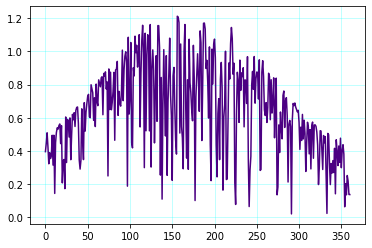

In [66]:
plt.plot(gg_index1, color='Indigo')
plt.grid(b=True, color='aqua', alpha=0.3)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b3766042-07c9-4760-93f8-903e3b3586f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>